In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
!pip install scikit-optimize

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omaralnounou","key":"04273f6c36d6da8bad49ba994aca52b9"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c diamond-price-prediciton-2024
! unzip diamond-price-prediciton-2024.zip

  0% 0.00/865k [00:00<?, ?B/s]
100% 865k/865k [00:00<00:00, 117MB/s]
Archive:  diamond-price-prediciton-2024.zip
  inflating: test.csv                
  inflating: train.csv               


In [33]:
df = pd.read_csv('train.csv')

# EDA & Data visualization:

In [5]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [6]:
print(df.shape)
df.info()

(43152, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
df.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

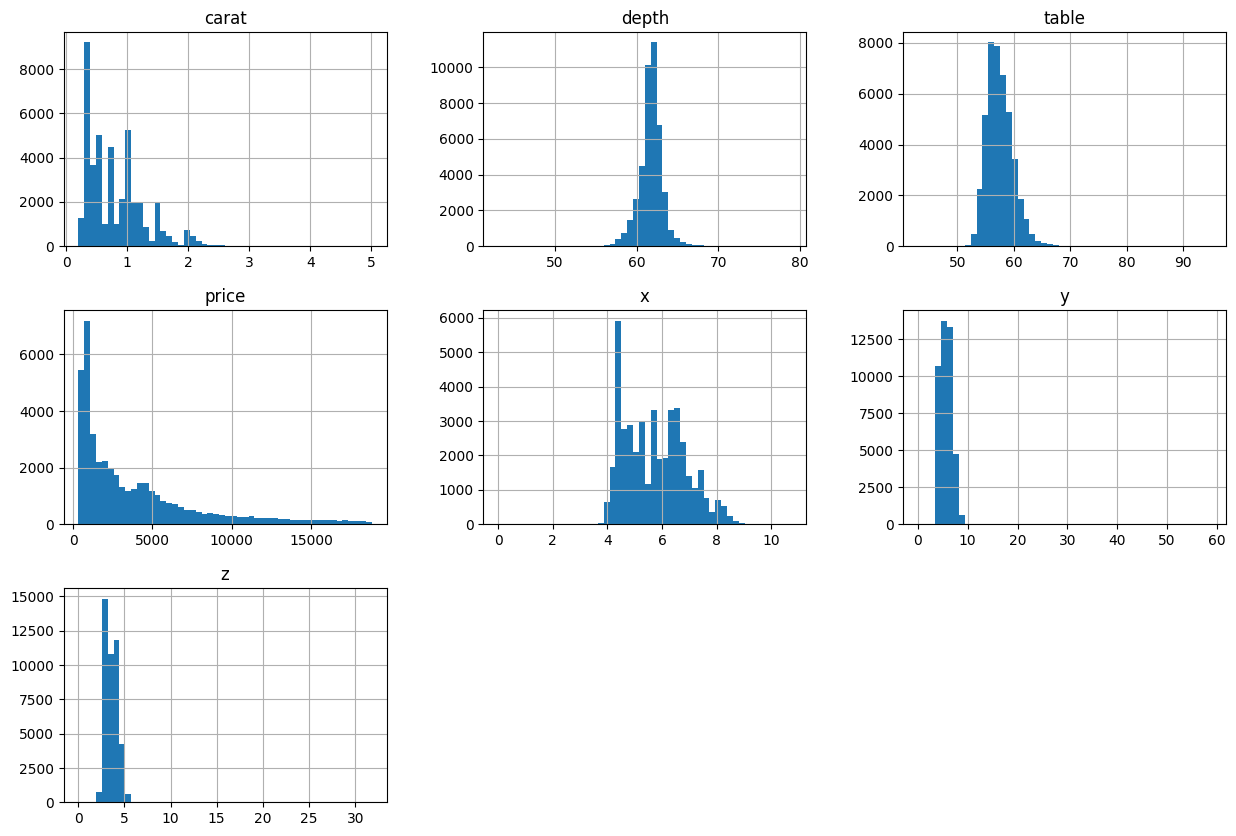

In [34]:
df.drop(['Id'], axis=1, inplace=True)

df.hist(bins=50, figsize=(15,10))
plt.show()

In [35]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.nlargest(20, 'price')

,carat,cut,color,clarity,depth,table,price,x,y,z
15499,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
12299,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
5152,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
25224,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
17325,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
34957,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
41575,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
25647,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
11221,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.00
40882,2.05,Premium,F,SI2,60.2,59.0,18784,8.28,8.33,5.00


In [15]:
df.nlargest(10, 'carat')

,carat,cut,color,clarity,depth,table,price,x,y,z
26886,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
31151,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
18840,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26030,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
7389,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
34465,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
16302,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
12566,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
41312,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
20984,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98


In [12]:
df_num = df.select_dtypes(exclude=['object'])
num_columns = df_num.columns.tolist()
num_columns

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

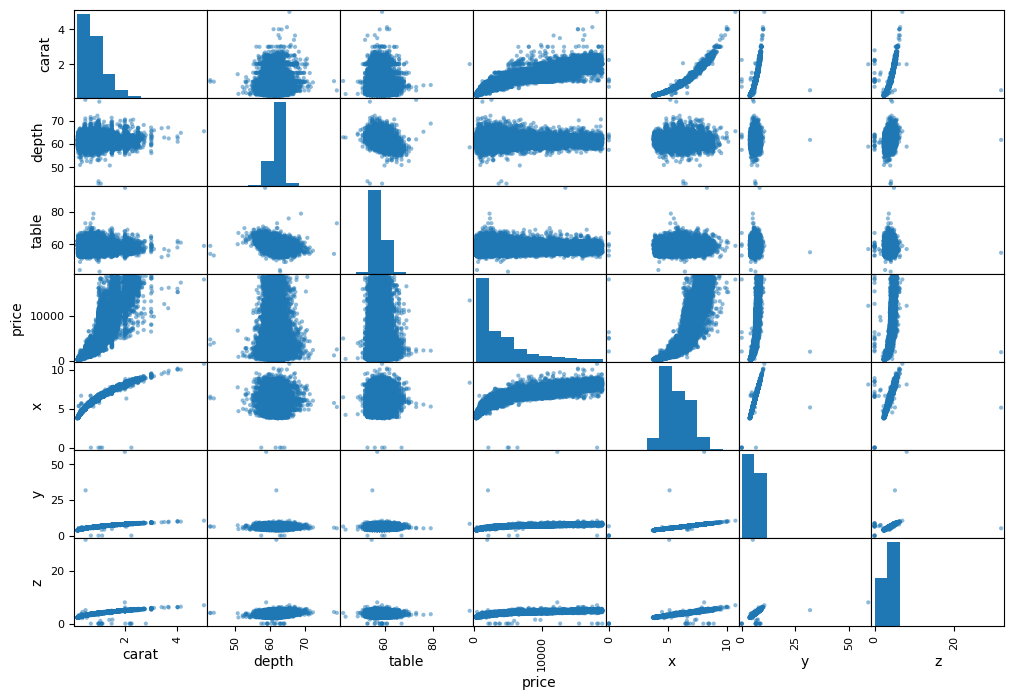

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_num, figsize=(12, 8))
plt.show()

In [14]:
corr_matrix = df_num.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
depth   -0.013137
Name: price, dtype: float64

In [16]:
df_cat = df.select_dtypes(include=['object'])
cat_columns = df_cat.columns.tolist()
cat_columns

['cut', 'color', 'clarity']

In [17]:
df_cat.nunique()

cut        5
color      7
clarity    8
dtype: int64

cut
Fair          1297
Good          3881
Very Good     9658
Premium      11113
Ideal        17203
Name: count, dtype: int64
*****************************
color
J    2290
I    4265
H    6651
G    9060
F    7633
E    7832
D    5421
Name: count, dtype: int64
*****************************
clarity
I1        606
SI2      7432
SI1     10428
VS2      9824
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
Name: count, dtype: int64
*****************************


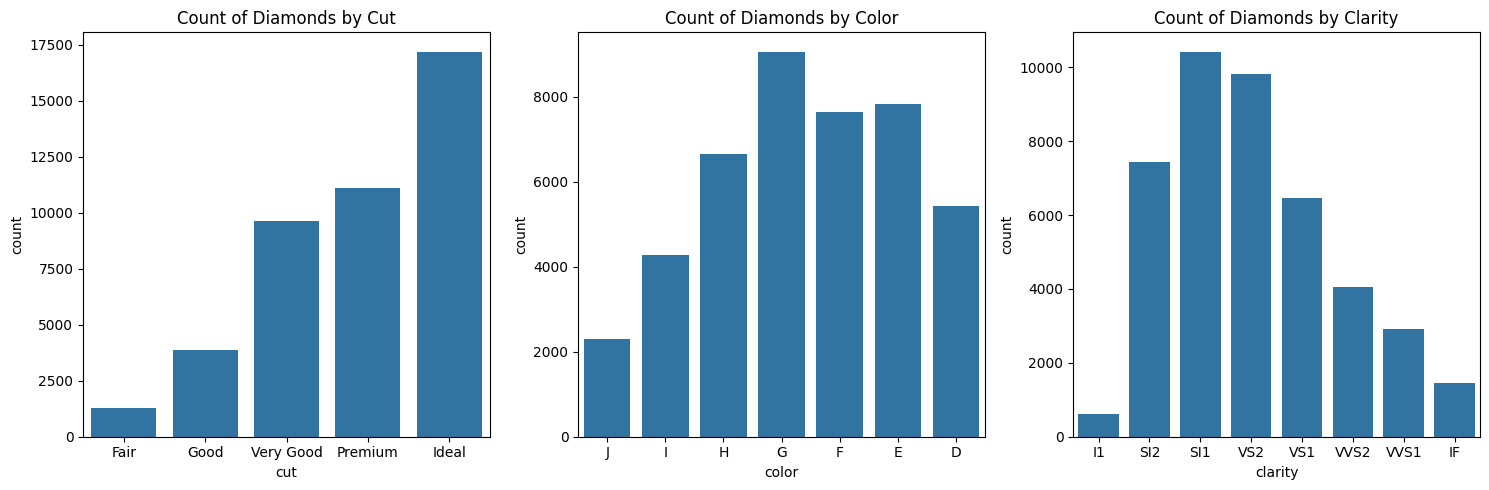

In [19]:
custom_order_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
custom_order_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

cut_counts = df_cat['cut'].value_counts().loc[custom_order_cut]
print(cut_counts)
print("*****************************")
color_counts = df_cat['color'].value_counts().sort_index(ascending=False)
print(color_counts)
print("*****************************")
custom_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_counts = df_cat['clarity'].value_counts().loc[custom_order_clarity]
print(clarity_counts)
print("*****************************")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=df_cat, x='cut', order=custom_order_cut, ax=axes[0])
axes[0].set_title('Count of Diamonds by Cut')

sns.countplot(data=df_cat, x='color', order=color_counts.index, ax=axes[1])
axes[1].set_title('Count of Diamonds by Color')


sns.countplot(data=df_cat, x='clarity', order=custom_order_clarity, ax=axes[2])
axes[2].set_title('Count of Diamonds by Clarity')

plt.tight_layout()
plt.show()

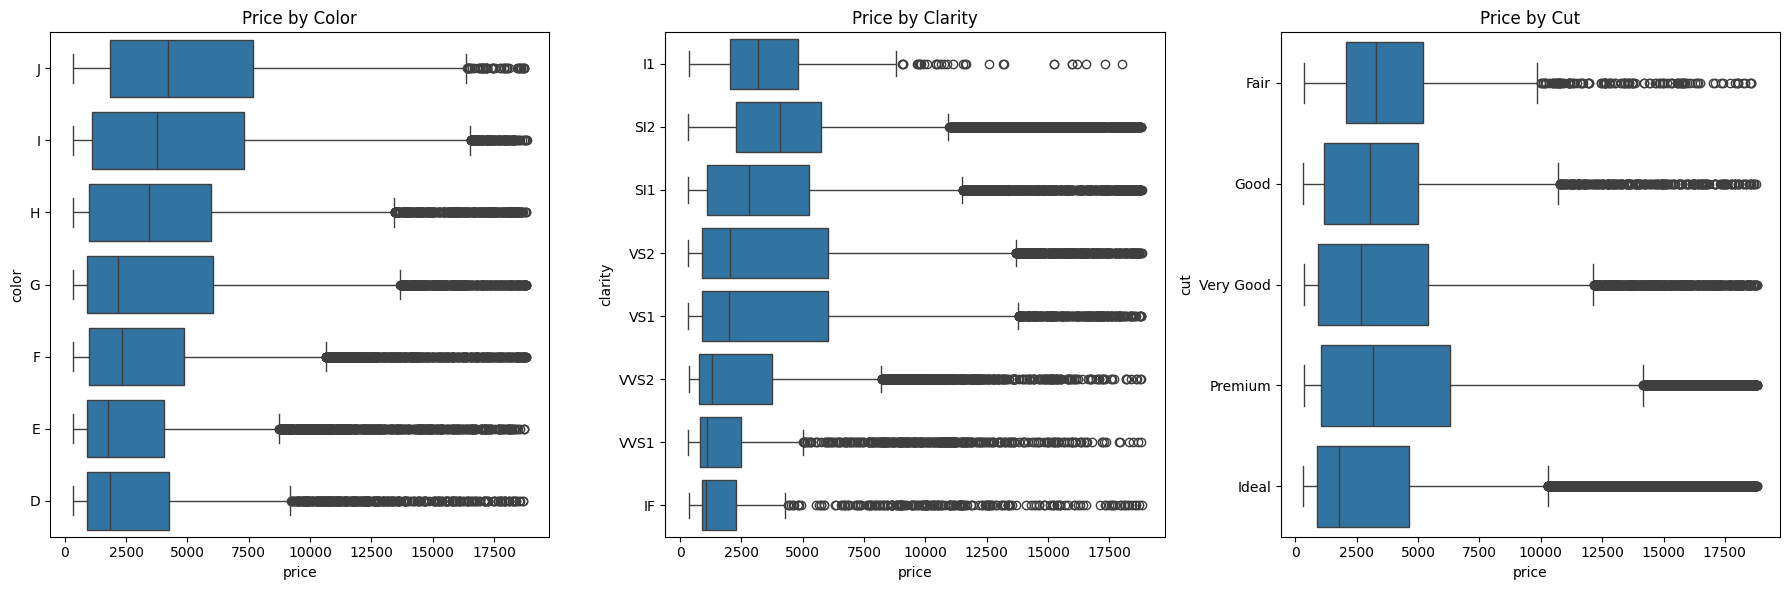

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x="price", y="color", order=color_counts.index, ax=axes[0])
axes[0].set_title('Price by Color')

sns.boxplot(data=df, x="price", y="clarity", order=custom_order_clarity, ax=axes[1])
axes[1].set_title('Price by Clarity')

sns.boxplot(data=df, x="price", y="cut", order=custom_order_cut, ax=axes[2])
axes[2].set_title('Price by Cut')

plt.tight_layout()
plt.show()

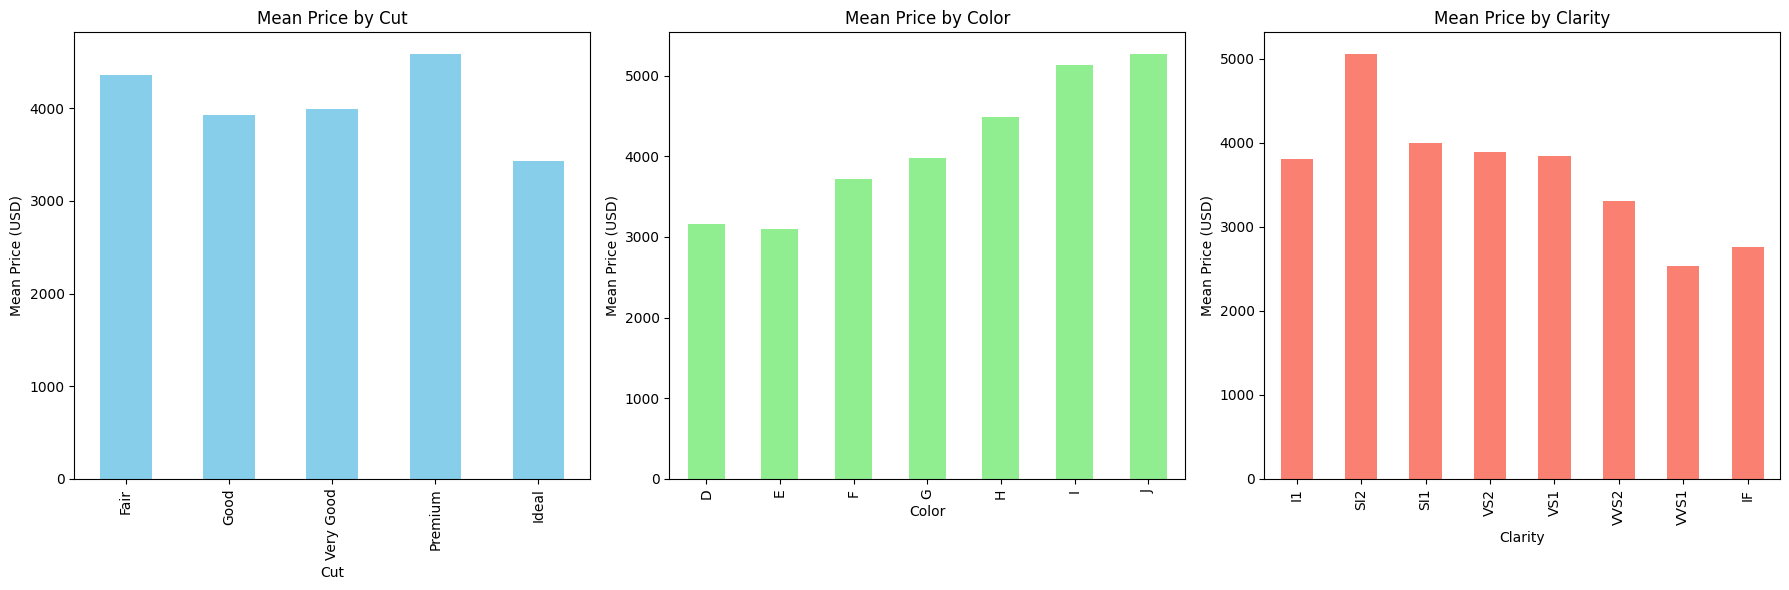

In [21]:
cut_price_mean = df.groupby('cut')['price'].mean().loc[custom_order_cut]
color_price_mean = df.groupby('color')['price'].mean()
clarity_price_mean = df.groupby('clarity')['price'].mean().loc[custom_order_clarity]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

cut_price_mean.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Mean Price by Cut')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Mean Price (USD)')

color_price_mean.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Mean Price by Color')
axes[1].set_xlabel('Color')
axes[1].set_ylabel('Mean Price (USD)')

clarity_price_mean.plot(kind='bar', color='salmon', ax=axes[2])
axes[2].set_title('Mean Price by Clarity')
axes[2].set_xlabel('Clarity')
axes[2].set_ylabel('Mean Price (USD)')

plt.tight_layout()

plt.show()

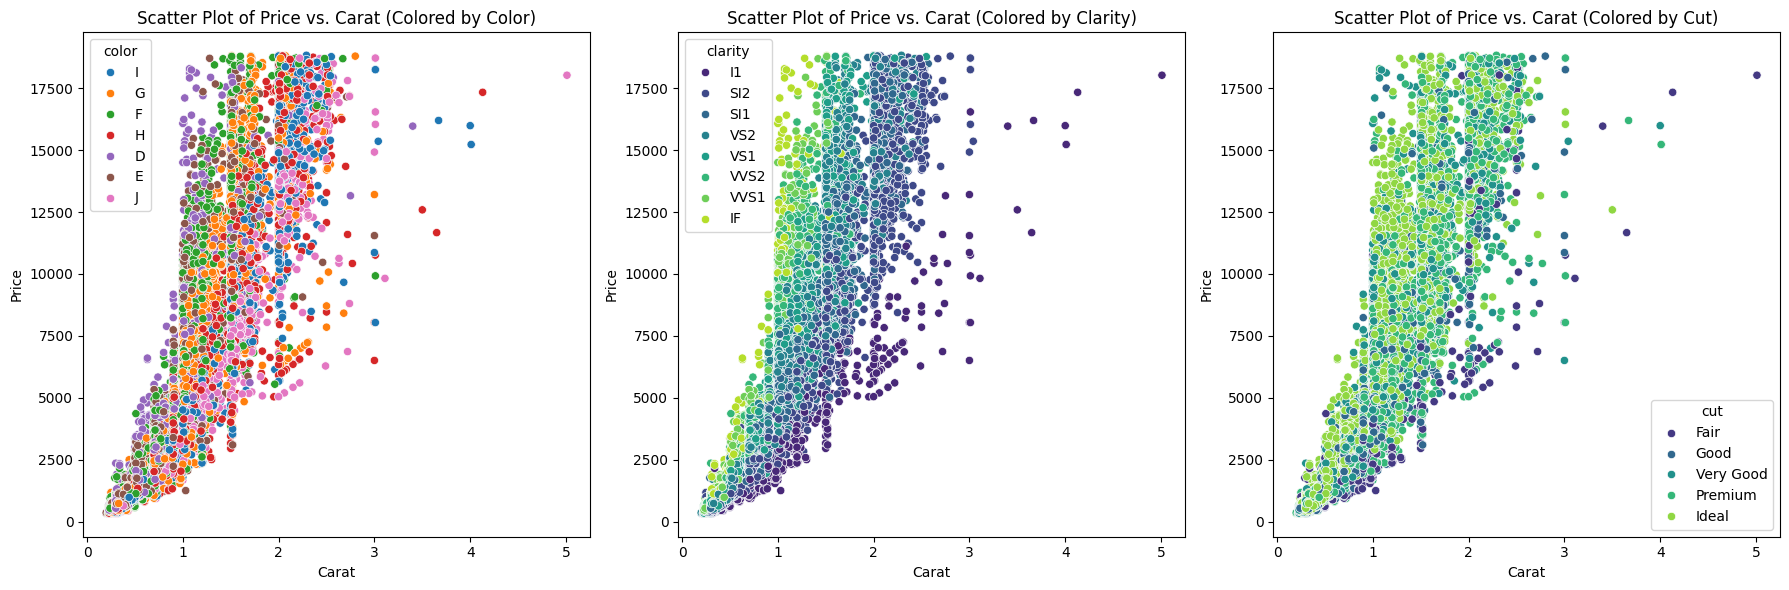

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df, x='carat', y='price', hue='color', ax=axes[0])
axes[0].set_title('Scatter Plot of Price vs. Carat (Colored by Color)')
axes[0].set_xlabel('Carat')
axes[0].set_ylabel('Price')

sns.scatterplot(data=df, x='carat', y='price', hue='clarity', palette='viridis', hue_order=custom_order_clarity, ax=axes[1])
axes[1].set_title('Scatter Plot of Price vs. Carat (Colored by Clarity)')
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('Price')

sns.scatterplot(data=df, x='carat', y='price', hue='cut', palette='viridis', hue_order=custom_order_cut, ax=axes[2])
axes[2].set_title('Scatter Plot of Price vs. Carat (Colored by Cut)')
axes[2].set_xlabel('Carat')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

# Dealing with outliers and null values

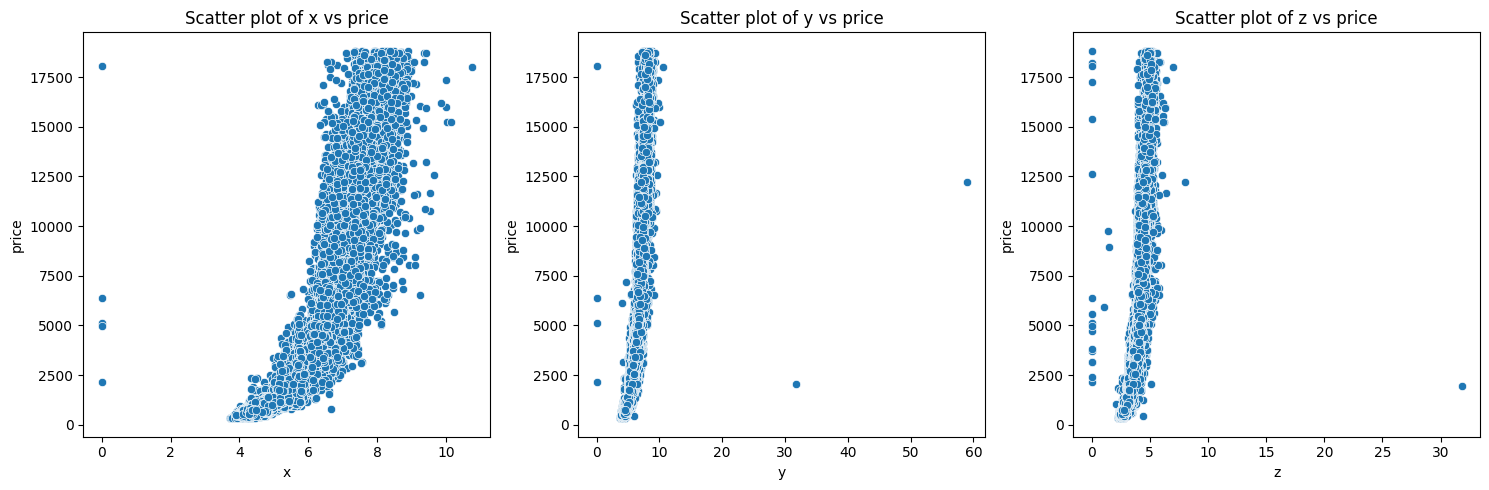

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="x", y="price")
plt.title("Scatter plot of x vs price")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="y", y="price")
plt.title("Scatter plot of y vs price")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="z", y="price")
plt.title("Scatter plot of z vs price")

plt.tight_layout()
plt.show()

In [36]:
df.drop(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index, inplace=True)

In [37]:
df.drop(df[(df['y'] > 30) | (df['z'] > 30)].index, inplace=True)

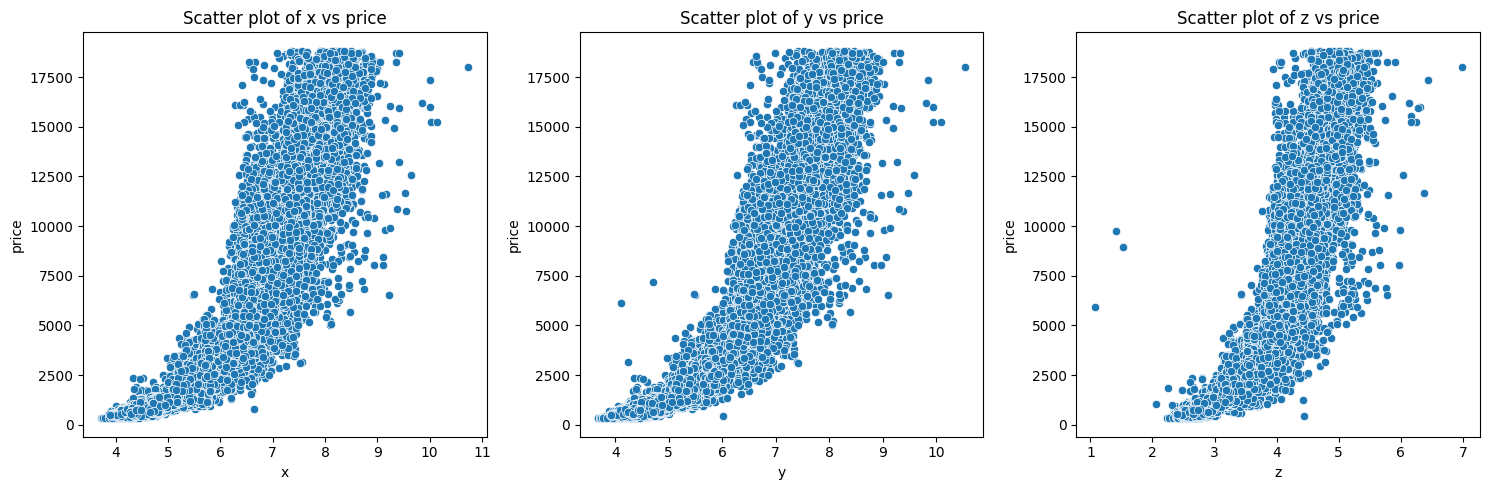

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="x", y="price")
plt.title("Scatter plot of x vs price")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="y", y="price")
plt.title("Scatter plot of y vs price")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="z", y="price")
plt.title("Scatter plot of z vs price")

plt.tight_layout()
plt.show()

In [31]:
df[df['z'] < 2]

,carat,cut,color,clarity,depth,table,price,x,y,z
17943,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41
18444,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
41462,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53


note: we could tell we still have some outliers, but printing their corresponding rows we can tell they have other high attributes like the [carat], nonetheless a better -more scientific  oriented- outlier detection system should've been in order

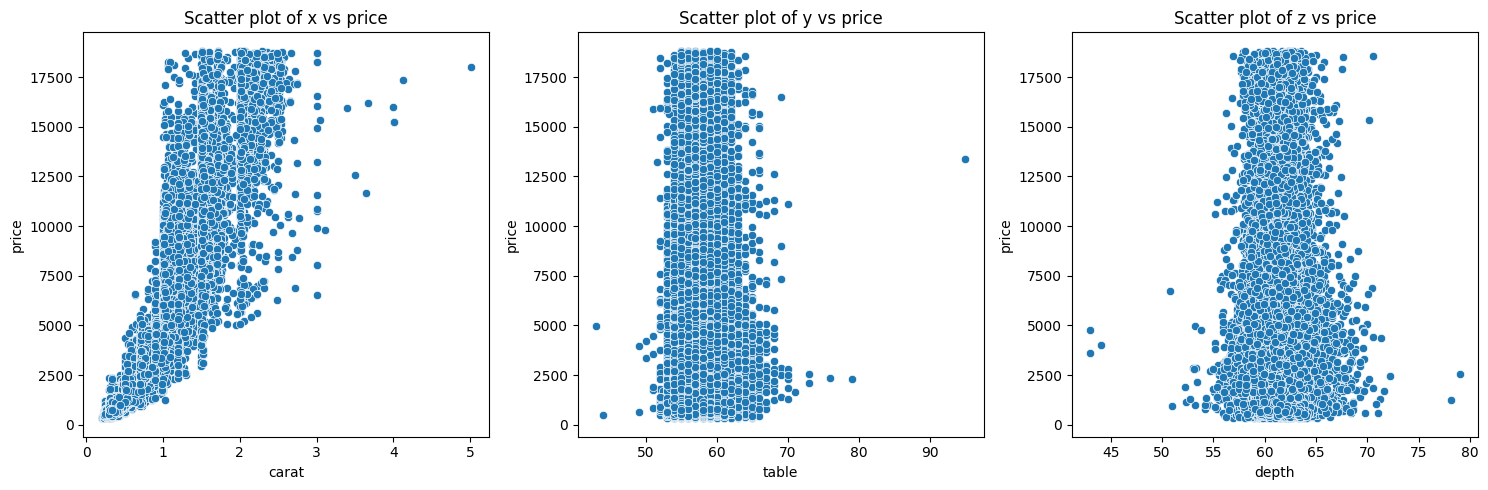

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="carat", y="price")
plt.title("Scatter plot of x vs price")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="table", y="price")
plt.title("Scatter plot of y vs price")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="depth", y="price")
plt.title("Scatter plot of z vs price")

plt.tight_layout()
plt.show()

In [41]:
df.drop(df[(df['carat'] > 5) | (df['table'] > 85) | (df['table'] < 35) | (df['depth'] > 75) | (df['depth'] < 45)].index, inplace=True)

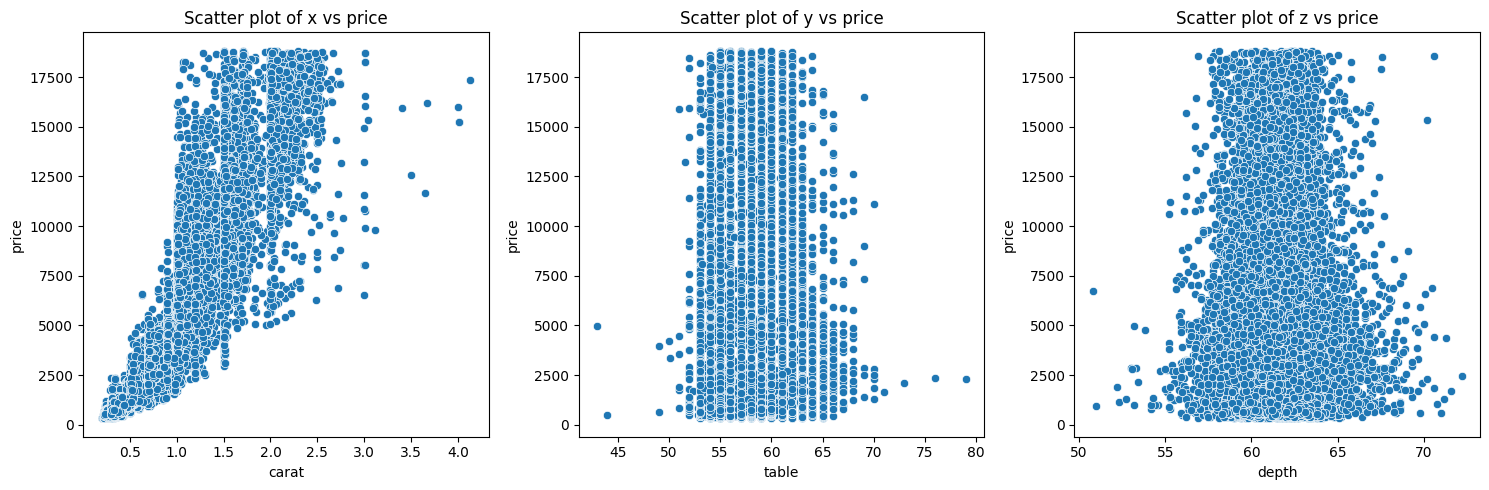

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="carat", y="price")
plt.title("Scatter plot of x vs price")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="table", y="price")
plt.title("Scatter plot of y vs price")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="depth", y="price")
plt.title("Scatter plot of z vs price")

plt.tight_layout()
plt.show()

note 2: as mentioned above, a density or statistical approach to removing outliers would've been better.

In [54]:
df.shape

(43125, 10)

In [56]:
df = df.reset_index(drop=True)

In [57]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


# Handling text and data scaling

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.column, axis=1)

numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

custom_order_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
custom_order_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
custom_order_color = sorted(df['color'].unique(), reverse=True)

categorical_features_ordinal = ['clarity', 'cut', 'color']
categorical_transformer_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories=[custom_order_clarity, custom_order_cut, custom_order_color]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_ordinal', categorical_transformer_ordinal, categorical_features_ordinal)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X = df.drop('price', axis=1)
y = df['price'].copy()

X_transformed = pipeline.fit_transform(X, y)


In [59]:
X_transformed[0]

array([ 0.55529942,  0.03661112, -0.20542697,  0.74928343,  0.78028552,
        0.76841528,  1.        ,  4.        ,  1.        ])

In [61]:
ordinal_encoder = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder']

# Print the categories of the OrdinalEncoder along with their corresponding values
for feature, categories in zip(categorical_features_ordinal, ordinal_encoder.categories_):
    print(f"{feature}:")
    for i, category in enumerate(categories):
        print(f"  {i}: {category}")


clarity:
  0: I1
  1: SI2
  2: SI1
  3: VS2
  4: VS1
  5: VVS2
  6: VVS1
  7: IF
cut:
  0: Fair
  1: Good
  2: Very Good
  3: Premium
  4: Ideal
color:
  0: J
  1: I
  2: H
  3: G
  4: F
  5: E
  6: D


# Training ML Model

## 1) LinearRegression

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_transformed, y)

LinearRegression()

In [63]:
from sklearn.metrics import mean_squared_error

linreg_predictions = lin_reg.predict(X_transformed)
train_rmse = mean_squared_error(y, linreg_predictions, squared=False)
train_rmse

1197.6854328980878

## 2) RandomForest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

forest_scores = -cross_val_score(forest_reg, X_transformed, y,
                              scoring = 'neg_root_mean_squared_error', cv = 10)

In [65]:
print("Scores: ", forest_scores)
print("Mean: ", forest_scores.mean())
print("Standard Deviation: ", forest_scores.std())
print("```````````````````````")

pd.Series(forest_scores).describe()

Scores:  [577.18854317 527.59731882 557.41321941 529.7213255  559.63107793
 539.37636902 549.50269784 535.95180447 511.05563274 562.1110291 ]
Mean:  544.9549017990316
Standard Deviation:  18.759814439934154
```````````````````````


count     10.000000
mean     544.954902
std       19.774581
min      511.055633
25%      531.278945
50%      544.439533
75%      559.076613
max      577.188543
dtype: float64

3) XGBOOST with Hyperparameter tuning

In [68]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor

search_spaces = {
    'max_depth': (3, 15),
    'n_estimators': (50, 500),
    'learning_rate': (0.01, 0.5, 'log-uniform'),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

xgb_reg = XGBRegressor(random_state=42)

bayes_search = BayesSearchCV(xgb_reg, search_spaces, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
bayes_search.fit(X_transformed, y)

best_xgb_reg = bayes_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [69]:
best_params = best_xgb_reg.get_params()
print("Best Model Parameters:", best_params)

y_pred = best_xgb_reg.predict(X_transformed)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred, squared=False)
print("Best Model RMSE:", rmse)


Best Model Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.051150162321728296, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Best Model RMSE: 408.4985576599912


# Test

In [70]:
test = pd.read_csv('test.csv')

In [71]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [72]:
ID=test['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [73]:
X_test_transformed = pipeline.transform(test)

In [74]:
X_test_transformed[0]

array([-0.96736134, -0.45561628, -0.20542697, -1.08264036, -1.12778649,
       -1.14171495,  5.        ,  4.        ,  3.        ])

In [75]:
test_predictions = best_xgb_reg.predict(X_test_transformed)

In [76]:
data={'ID':ID,'price':test_predictions}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)

In [77]:
pd.read_csv('sub.csv')

,ID,price
0,1,859.6654
1,2,2867.3552
2,3,810.8606
3,4,2797.0413
4,5,1143.7470
...,...,...
10783,10784,1686.4548
10784,10785,6601.8360
10785,10786,4232.2627
10786,10787,4739.4990
